# Simple example of integrating the hydrogen wavefunction

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("numerov").setLevel(logging.DEBUG)

In [2]:
n, l = 30, 29
atom = RydbergState("Rb", n=n, l=l, j=l + 0.5, steps=10_000)

DEBUG database.py: No model potential parameters found for Rb with L=29, trying largest L
DEBUG database.py: No Rydberg-Ritz parameters found for Rb with L=29 and J=29, trying largest L and J


In [3]:
atom.integrate()

In [4]:
hydrogen = RydbergState("H", n=atom.n, l=atom.l, j=atom.j, steps=atom.steps)
hydrogen.integrate()

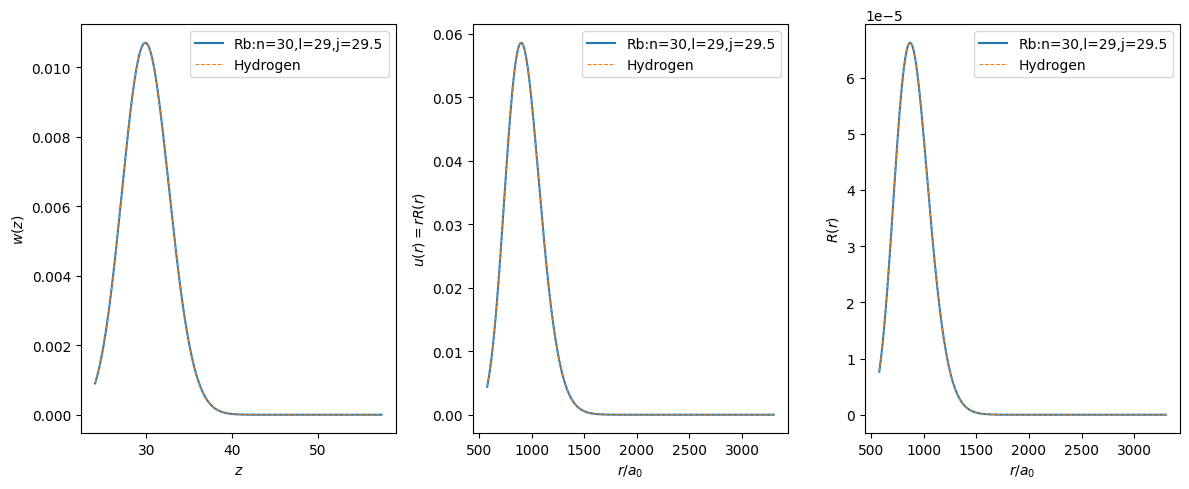

In [5]:
label = f"{atom.species}:n={atom.n},l={atom.l},j={atom.j}"
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].plot(atom.z_list, atom.w_list, "C0-", label=label)
axs[0].plot(hydrogen.z_list, hydrogen.w_list, "C1--", lw=0.75, label="Hydrogen")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$w(z)$")
axs[0].legend()

axs[1].plot(atom.x_list, atom.u_list, "C0-", label=label)
axs[1].plot(hydrogen.x_list, hydrogen.u_list, "C1--", lw=0.75, label="Hydrogen")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$u(r) = r R(r)$")
axs[1].legend()

axs[2].plot(atom.x_list, atom.R_list, "C0-", label=label)
axs[2].plot(hydrogen.x_list, hydrogen.R_list, "C1--", lw=0.75, label="Hydrogen")
axs[2].set_xlabel(r"$r / a_0$")
axs[2].set_ylabel(r"$R(r)$")
axs[2].legend()

fig.tight_layout()
plt.show()

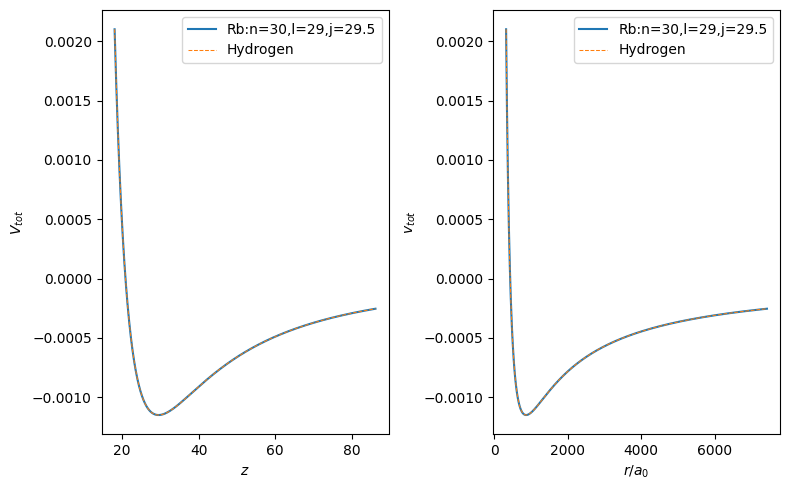

Rb energy: -0.0011111039152883152
Hydrogen energy: -0.0011111111111111111


In [6]:
label = f"{atom.species}:n={atom.n},l={atom.l},j={atom.j}"
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
z_list = np.linspace(0.75 * np.sqrt(atom.xmin), 1.5 * np.sqrt(atom.xmax), 10_000)
x_list = np.power(z_list, 2)
atom_V_Tot = atom.calc_V_tot(z_list)
hydrogen_V_Tot = hydrogen.calc_V_tot(z_list)

axs[0].plot(z_list, atom_V_Tot, "C0-", label=label)
axs[0].plot(z_list, hydrogen_V_Tot, "C1--", lw=0.75, label="Hydrogen")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$V_{tot}$")
axs[0].legend()

axs[1].plot(x_list, atom_V_Tot, "C0-", label=label)
axs[1].plot(x_list, hydrogen_V_Tot, "C1--", lw=0.75, label="Hydrogen")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$v_{tot}$")
axs[1].legend()


fig.tight_layout()
plt.show()

print(f"{atom.species} energy: {atom.energy}")
print(f"Hydrogen energy: {hydrogen.energy}")